In [534]:
# setup 
import networkx as nx
import yaml
import random
import matplotlib.pyplot as plt
import os
from utils import *
%matplotlib inline

Loading graph from file... Done!


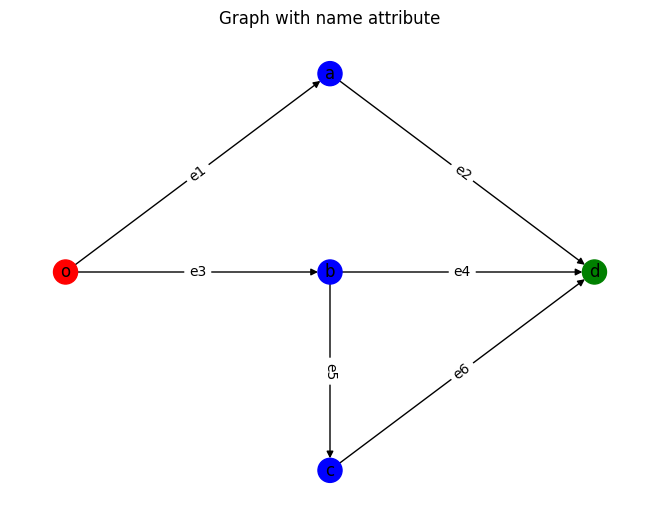

In [535]:
if os.path.exists('config/graph.yaml'):
    print("Loading graph from file...", end=" ")
    # load graph from file
    with open('config/graph.yaml', 'r') as f:
        data = yaml.load(f, Loader=yaml.FullLoader)
        G = nx.node_link_graph(data)
    print("Done!")
else:
    print("Creating graph...", end=" ")
    # create graph
    G = create_G()
    print("Done!")
    # save graph to file
    print("Saving graph to file...", end=" ")
    with open('config/graph.yaml', 'w') as f:
        data = nx.node_link_data(G)
        yaml.dump(data, f)
    print("Done!")

# draw graph
draw(G, attribute='name')
    

In [536]:
question1 = """Point a:
What is the minimum aggregate capacity that needs to be removed for no 
feasible flow from o to d to exist?
"""
answer = """Answer:
The maximum flow is corresponding to the minimum aggregate capacity
we need to subtract to isolate o and d.

In our case"""
# find and print maximum flow
max_flow = nx.maximum_flow_value(G, 'o', 'd')

print(question1)
print(f"{answer}, {max_flow}.")

Point a:
What is the minimum aggregate capacity that needs to be removed for no 
feasible flow from o to d to exist?

Answer:
The maximum flow is corresponding to the minimum aggregate capacity
we need to subtract to isolate o and d.

In our case, 5.


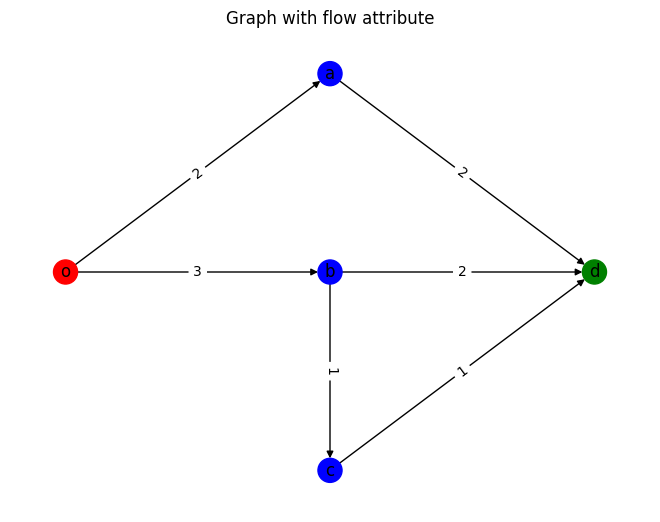

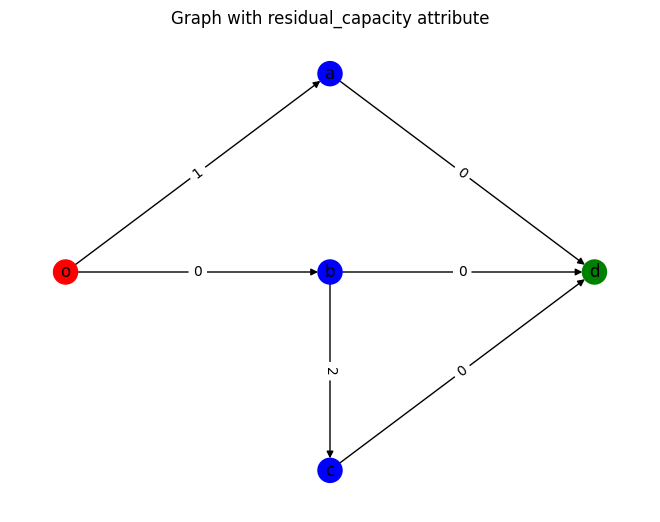

Point b:
What is the maximum aggregate capacity that can be removed from
the links without affecting the maximum throughput from o to d?

Answer:
The maximum aggregate capacity that can be removed from the links
can be obtained by subtracting the maximum flow of each edge from 
its capacity, and summing up the result.

In our case 3.


In [540]:
question2 = """Point b:
What is the maximum aggregate capacity that can be removed from
the links without affecting the maximum throughput from o to d?
"""

answer="""Answer:
The maximum aggregate capacity that can be removed from the links
can be obtained by subtracting the maximum flow of each edge from 
its capacity, and summing up the result.

In our case"""

# update max flows
update_edge_flows(G)
# draw the graph with edge labels
draw(G, attribute='flow')

# find residual capacity, the unused one, for each edge
residuals = update_residual_capacities(G)
# draw the graph with edge labels
draw(G, attribute='residual_capacity')

# print answer
print(question2)
print(f"{answer} {sum(residuals.values())}.")

In [541]:
question3 = """Point c:
You are given x > 0 extra units of capacity. How should you distribute them
in order to maximize the throughput that can be sent from o to d? Plot the 
maximum throughput from o to d as a function of x ≥0.
"""
answer = """Answer:
I would work this way:
1.  Find the minimum cat partition.
2.  Increment edge capacity.
3.  Find new minimum cat partition.
4.  Repeat until end."""

print(question3)
print(answer)

Point c:
You are given x > 0 extra units of capacity. How should you distribute them
in order to maximize the throughput that can be sent from o to d? Plot the 
maximum throughput from o to d as a function of x ≥0.

Answer:
I would work this way:
1.  Find the minimum cat partition.
2.  Increment edge capacity.
3.  Find new minimum cat partition.
4.  Repeat until end.


Capacity to be added: 10
Minimum cut value: 5
Minimum cut partition: {'c', 'b', 'a', 'o'}, {'d'}


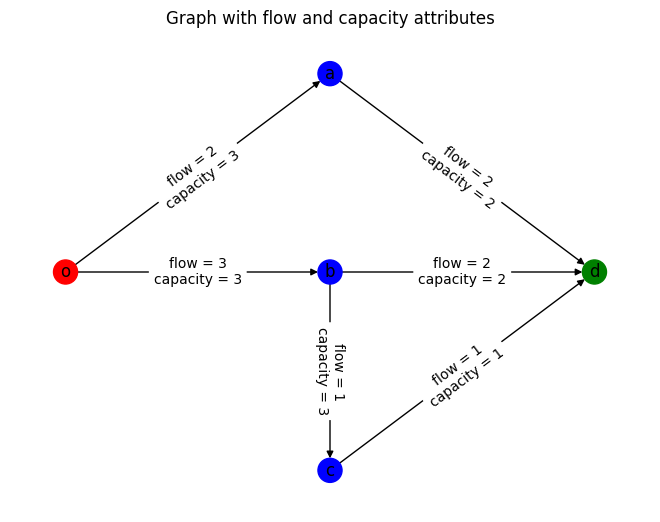

Edge ('a', 'd') increased cut value from 5 to 6
Capacity to be added: 9
Minimum cut value: 6
Minimum cut partition: {'c', 'b', 'a', 'o'}, {'d'}


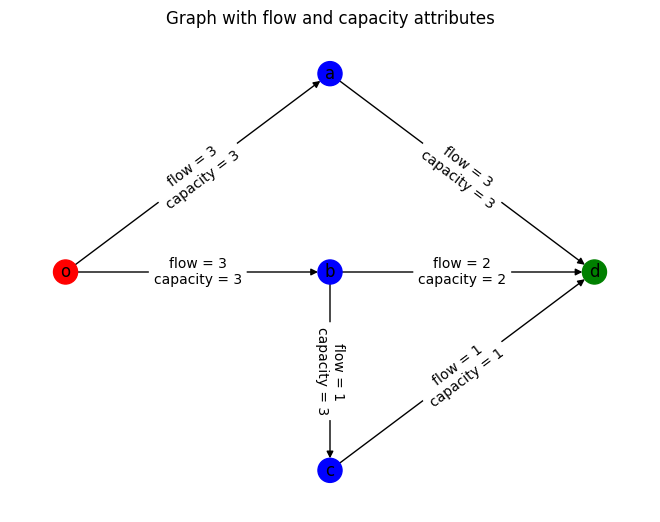

Edge ('b', 'd') increased cut value from 6 to 6
Capacity to be added: 8
Minimum cut value: 6
Minimum cut partition: {'a', 'o'}, {'c', 'b', 'd'}


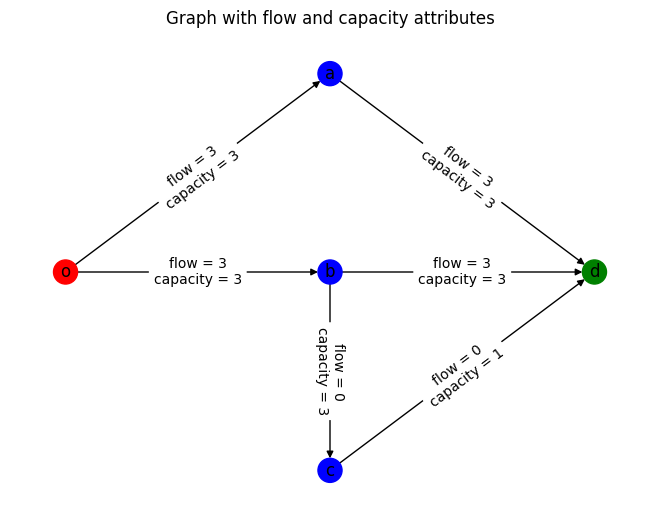

Edge ('o', 'b') increased cut value from 6 to 7
Capacity to be added: 7
Minimum cut value: 7
Minimum cut partition: {'c', 'b', 'a', 'o'}, {'d'}


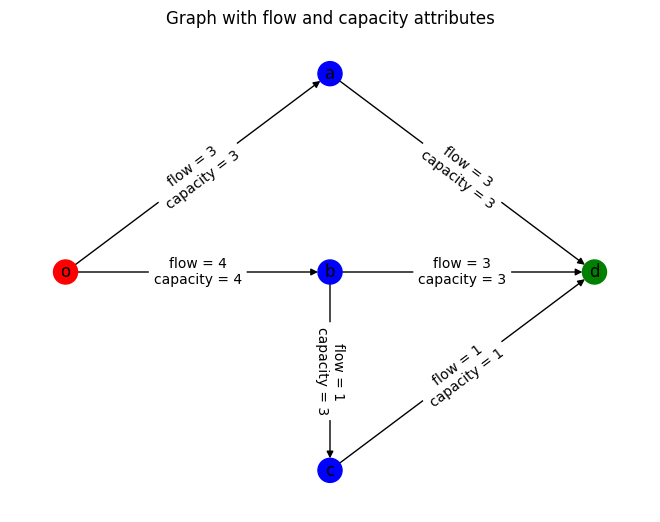

Edge ('a', 'd') increased cut value from 7 to 7
Capacity to be added: 6
Minimum cut value: 7
Minimum cut partition: {'c', 'b', 'o'}, {'a', 'd'}


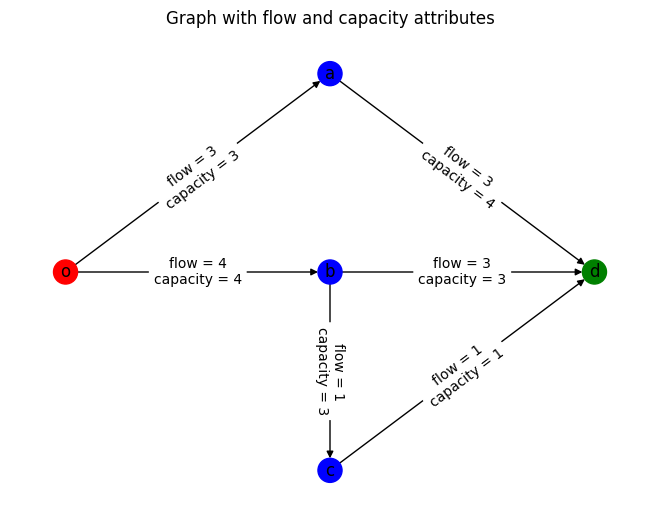

Edge ('o', 'a') increased cut value from 7 to 8
Capacity to be added: 5
Minimum cut value: 8
Minimum cut partition: {'c', 'b', 'a', 'o'}, {'d'}


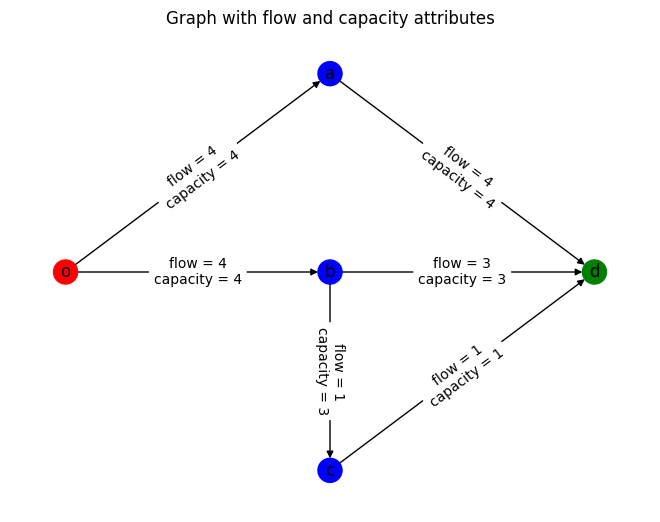

Edge ('c', 'd') increased cut value from 8 to 8
Capacity to be added: 4
Minimum cut value: 8
Minimum cut partition: {'a', 'o'}, {'c', 'b', 'd'}


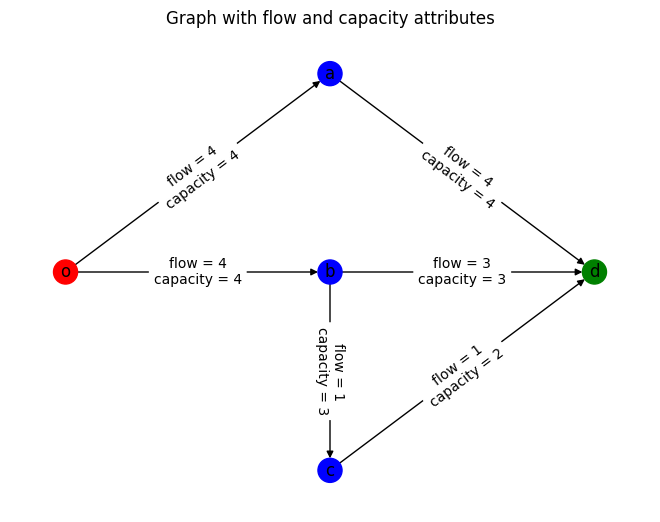

Edge ('o', 'b') increased cut value from 8 to 9
Capacity to be added: 3
Minimum cut value: 9
Minimum cut partition: {'c', 'b', 'a', 'o'}, {'d'}


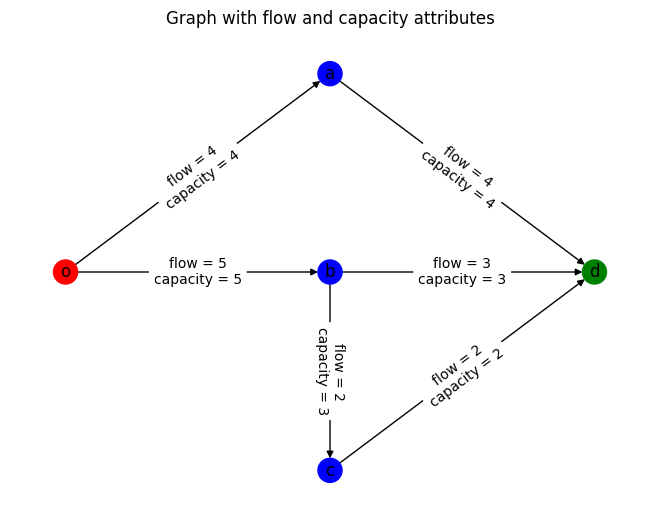

Edge ('c', 'd') increased cut value from 9 to 9
Capacity to be added: 2
Minimum cut value: 9
Minimum cut partition: {'a', 'o'}, {'c', 'b', 'd'}


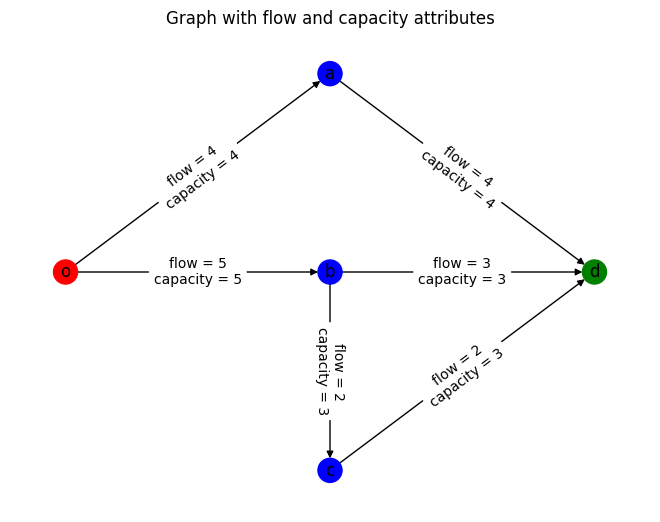

Edge ('a', 'd') increased cut value from 9 to 9
Capacity to be added: 1
Minimum cut value: 9
Minimum cut partition: {'o'}, {'b', 'c', 'a', 'd'}


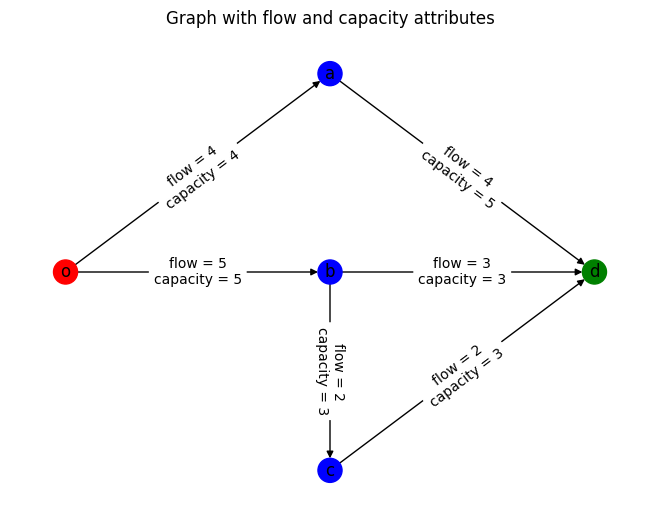

Edge ('o', 'a') increased cut value from 9 to 10
Capacity to be added: 0
Minimum cut value: 10
Minimum cut partition: {'a', 'o'}, {'c', 'b', 'd'}


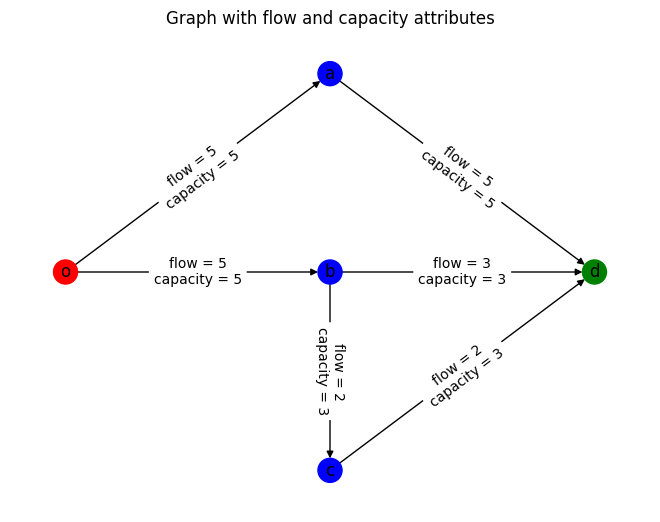

In [542]:
capacity = 10

G_new = G.copy()
G_old = G.copy()

while True:
    max_flow, partition = nx.minimum_cut(G_old, 'o', 'd')
    reachable, non_reachable = partition
    print(f"Capacity to be added: {capacity}")
    print(f"Minimum cut value: {max_flow}")
    print(f"Minimum cut partition: {reachable}, {non_reachable}")
    # update attributes of G_new
    update_edge_flows(G_new)
    update_residual_capacities(G_new)
    draw_all(G_new, save_fig=False)
    if capacity <= 0:
        break

    # find edges which start in first and end in second partition
    edges_to_increase = [
        edge
        for edge in G_old.edges
        if edge[0] in reachable and edge[1] in non_reachable
    ]

    # increase capacity of edge
    edge = edges_to_increase[random.randint(0, len(edges_to_increase)-1)]
    G_new[edge[0]][edge[1]]['capacity'] += 1

    # check if the max flow increased
    new_max_flow = nx.maximum_flow_value(G_new, 'o', 'd')

    # print the edge which increased the cut value
    print(f"Edge {edge} increased cut value from {max_flow} to {new_max_flow}")  
    
    # update capacity to be added
    capacity -= 1

    # update graph
    G_old = G_new.copy()
